<a href="https://colab.research.google.com/github/zcvpal2/Aiffel-follow-deep-learning/blob/main/%EC%97%B0%EC%8A%B52.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

mnist = keras.datasets.mnist


(x_train, y_train), (x_test, y_test) = mnist.load_data()   


x_train_norm, x_test_norm = x_train / 255.0, x_test / 255.0

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(28,28,1)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(32, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(32, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

model.summary()

11501568/11490434 [==============================] - 0s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 16)        160       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 800)               0         
                                                         

In [2]:
print("Before Reshape - x_train_norm shape: {}".format(x_train_norm.shape))
print("Before Reshape - x_test_norm shape: {}".format(x_test_norm.shape))

x_train_reshaped=x_train_norm.reshape( -1, 28, 28, 1)  # reshape로 갯수를 -1로 하면 자동
x_test_reshaped=x_test_norm.reshape( -1, 28, 28, 1)

print("After Reshape - x_train_reshaped shape: {}".format(x_train_reshaped.shape))
print("After Reshape - x_test_reshaped shape: {}".format(x_test_reshaped.shape))

Before Reshape - x_train_norm shape: (60000, 28, 28)
Before Reshape - x_test_norm shape: (10000, 28, 28)
After Reshape - x_train_reshaped shape: (60000, 28, 28, 1)
After Reshape - x_test_reshaped shape: (10000, 28, 28, 1)


### 학습을 10번 반복하기 위해서 epochs = 10으로

In [3]:
model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

model.fit(x_train_reshaped, y_train, epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 16s 3ms/step - loss: 0.1995 - accuracy: 0.9388
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0639 - accuracy: 0.9804
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0477 - accuracy: 0.9852
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0380 - accuracy: 0.9880
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0302 - accuracy: 0.9903
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0252 - accuracy: 0.9915
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0210 - accuracy: 0.9936
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0176 - accuracy: 0.9944
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0149 - accuracy: 0.9954
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.01

인식 정확도가 어디서부터 미미하게 향상하는지 보고 적절한 epoch를 생각해보는 습관을 들인다




지금까지는 훈련데이터로 성과를 측정하는 거는 연습문제를 푸는 인공지능을 만든거, 그럼 본 시험에서는 어떻게 진행 되는지 test데이터를 이용해서 성능을 확인해 보자 
x_test, y_test를 model.evaluate를 이용해  loss와 accuracy 값을 측정해보자

In [4]:
test_loss, test_accuracy = model.evaluate(x_test_reshaped, y_test, verbose = 2)
# model.evaluate의 결과로 loss와 accuracy가 순서대로 나온다
print("test_loss: {}".format(test_loss))
print("test_accuracy:{}".format(test_accuracy))

313/313 - 1s - loss: 0.0392 - accuracy: 0.9889 - 805ms/epoch - 3ms/step
test_loss: 0.03917201980948448
test_accuracy:0.9889000058174133


어떤 데이터를 잘못 추론했는지 확인 
model.predict를 이용해서 실제로 추론한 확률분포를 알 수 있다.

In [6]:
predicted_result = model.predict(x_test_reshaped)  # 각각의 test값에 대해서 predict한다. 
predicted_labels = np.argmax(predicted_result, axis=1) #예측했을 때 가장 가능성이 높은 결과

idx=0   
print('model.predict() 결과 : ', predicted_result[idx])  
# 첫번째 test에 대해 예측한 결과(0,1,2,3,4,5,6,7,8,9)에 대한 확률값
print('model이 추론한 가장 가능성이 높은 결과 : ', predicted_labels[idx])
# 첫번째에서 가장 높은 값을 출력 
print('실제 데이터의 라벨 : ', y_test[idx])

model.predict() 결과 :  [2.5344065e-11 5.9418942e-10 1.3009381e-07 7.9635447e-07 8.3840934e-11
 1.7174025e-14 8.9577556e-14 9.9999905e-01 2.5928730e-13 1.8592741e-09]
model이 추론한 가장 가능성이 높은 결과 :  7
실제 데이터의 라벨 :  7


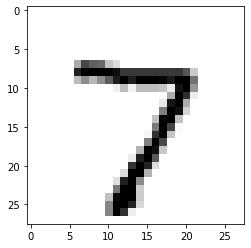

In [7]:
plt.imshow(x_test[idx],cmap=plt.cm.binary)
plt.show()

예측확률분포: [7.8902383e-05 1.6194378e-10 6.4084139e-05 1.7831829e-01 4.6560822e-06
 7.5412595e-06 1.3777554e-07 3.3579362e-11 8.2147831e-01 4.8069454e-05]
라벨: 3, 예측결과: 8


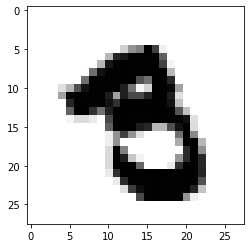

예측확률분포: [1.2330966e-04 2.4673918e-03 6.2397966e-04 3.8739315e-01 1.8269525e-04
 1.3824726e-03 4.7111345e-05 4.5460796e-01 6.0819977e-05 1.5311117e-01]
라벨: 9, 예측결과: 7


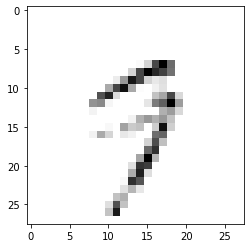

예측확률분포: [3.71620655e-01 2.70381779e-08 2.60315280e-09 9.69508896e-04
 8.20907246e-07 1.10186525e-02 3.34714681e-01 2.16295302e-08
 2.81675547e-01 7.67789885e-08]
라벨: 8, 예측결과: 0


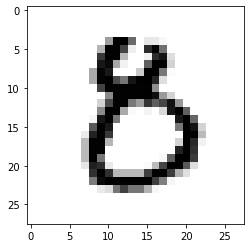

예측확률분포: [4.29790089e-04 1.87168084e-07 1.42311919e-05 1.22720815e-01
 3.91766916e-05 8.74033928e-01 2.21853401e-03 1.13827108e-08
 1.23901074e-04 4.19313816e-04]
라벨: 3, 예측결과: 5


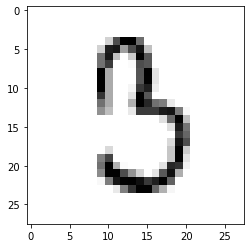

예측확률분포: [4.9468677e-04 6.7276327e-05 2.6699930e-01 2.1087780e-04 6.9279011e-08
 1.3253481e-13 4.6643339e-10 7.3222762e-01 1.5870469e-07 1.2339693e-08]
라벨: 2, 예측결과: 7


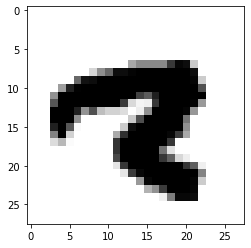

In [8]:
import random
wrong_predict_list=[]
for i, _ in enumerate(predicted_labels):
    if predicted_labels[i] != y_test[i]:
        wrong_predict_list.append(i)

samples = random.choices(population=wrong_predict_list, k=5)

for n in samples:
    print("예측확률분포: " + str(predicted_result[n]))
    print("라벨: " + str(y_test[n]) + ", 예측결과: " + str(predicted_labels[n]))
    plt.imshow(x_test[n], cmap=plt.cm.binary)
    plt.show()

성능을 더 높이기 위해 하이퍼파라미터를 수정해본다.
대표적으로 Conv2D의 입력 이미지의 특징 수를 늘리거나 줄이거나, Dense레이어 뉴런수를 바꾸거나, epoch 값을 변경 해 본다.

In [9]:
n_channel_1=16
n_channel_2=32
n_dense=32
n_train_epoch=10

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(n_channel_1, (3,3), activation='relu', input_shape=(28,28,1)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(n_channel_2, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(n_dense, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

model.summary()
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(x_train_reshaped, y_train, epochs=n_train_epoch)

test_loss, test_accuracy = model.evaluate(x_test_reshaped, y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 16)        160       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 16)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 11, 11, 32)        4640      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 800)               0         
                                                                 
 dense_2 (Dense)             (None, 32)               